># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 4 - Linear Regression [SOLUTION]</font>  </center>

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Consider the Life Expectancy dataset. The life expectancy (dependent variable, in column D) is going to be predicted using the attributes in columns E to V (independent variables, predictors).

Read the dataset into the variable df

In [39]:
df = pd.read_csv("/content/sample_data/Life Expectancy Data.csv")


Display the top 10 rows of the dataset

In [40]:
df.head(10)

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_19years,Thinness_5_9years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Discard the First three columns of the dataset

In [41]:
df = df.drop(['Country', 'Year', 'Status'], axis=1)

Display the names of the dependent variables

In [42]:
indPredictors = list(df.columns)
indPredictors.remove('LifeExpectancy')
indPredictors

['AdultMortality',
 'InfantDeaths',
 'Alcohol',
 'PercentageExpenditure',
 'HepatitisB',
 'Measles',
 'BMI',
 'UnderFiveDeaths',
 'Polio',
 'TotalExpenditure',
 'Diphtheria',
 'HIV_AIDS',
 'GDP',
 'Population',
 'Thinness_1_19years',
 'Thinness_5_9years',
 'IncomeCompositionOfResources',
 'Schooling']

Count and report the number of missing values in each variable (including both the dependent and independent variables)

In [43]:
print(df.isnull().sum())

LifeExpectancy                   10
AdultMortality                   10
InfantDeaths                      0
Alcohol                         194
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
UnderFiveDeaths                   0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV_AIDS                          0
GDP                             448
Population                      652
Thinness_1_19years               34
Thinness_5_9years                34
IncomeCompositionOfResources    167
Schooling                       163
dtype: int64


Impute the missing values in by their most mean values. All variables are numerical.

In [44]:
for col in list(df.columns):
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-973240712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Provide a correlation plot for the variables in the dataset, including the dependent variable. Comment on the strengths on the predictors. Comment on the correlations between predictors.

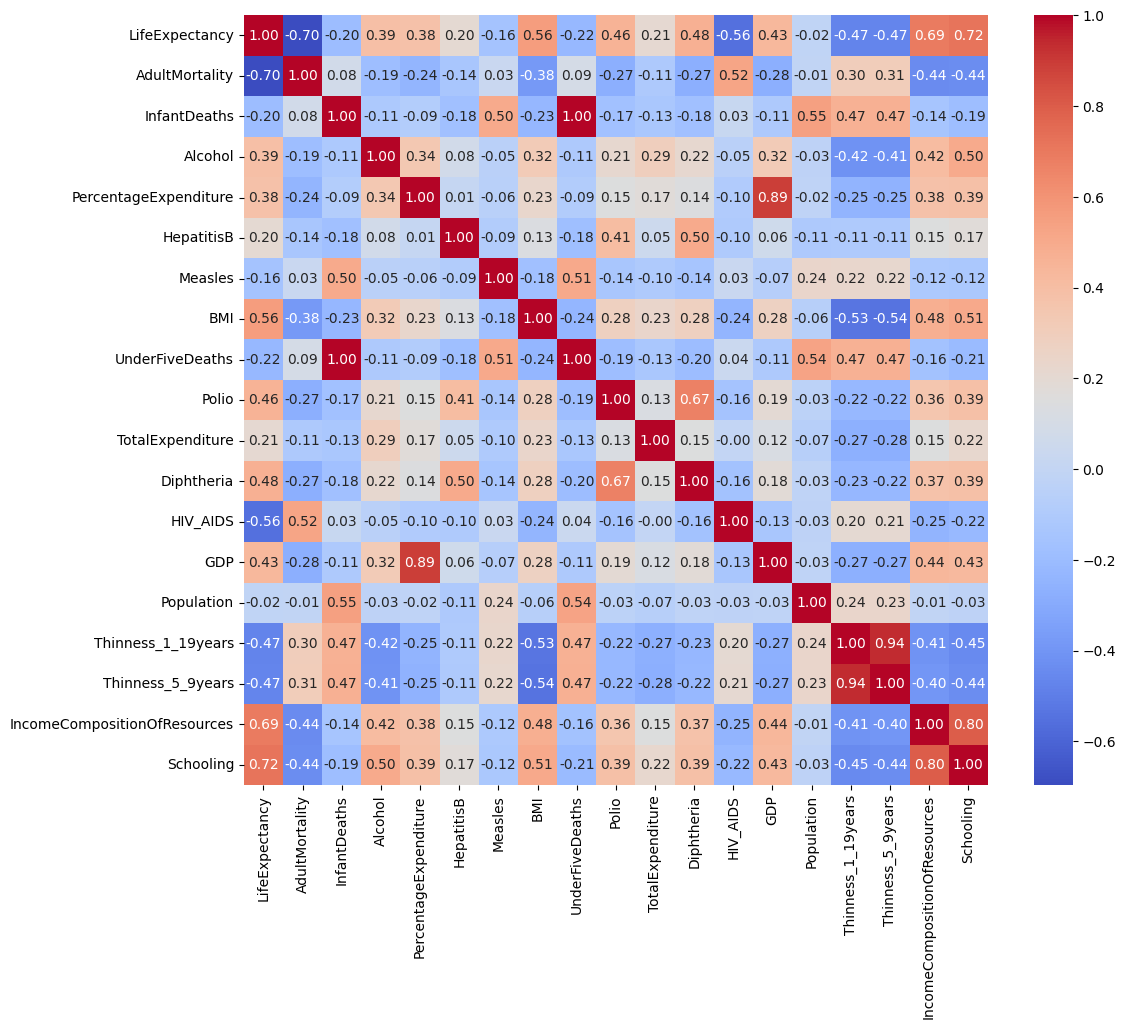

In [45]:
cormat = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cormat, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
plt.show()


After adding a constant column to the dataset, determine which independent variable is the most related with the dependent variable by developing a linear regression model between the dependent variable and each independent variable (include the const column as well). Rank the predictors according to the Adjusted R2 values of the linear models obtained.

HINT: Form a dictionary (named as RsqrDict) where each item is the name of the predictor and the value is the corresponding Adjusted R2 value. Then sort according the the values using <RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse = True)>

In [46]:
import statsmodels.api as sm

data = sm.add_constant(df)
indPredictors = list(data.columns)
indPredictors.remove('const')
indPredictors.remove('LifeExpectancy')
RsqrDict = {}

for variable in indPredictors:
    X = data[['const', variable]]
    y = data['LifeExpectancy']
    model = sm.OLS(y, X).fit()
    RsqrDict[variable] = model.rsquared_adj

print("The Adjusted Rsquared Values For Each Predictor")
print(RsqrDict)

RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse=True)
print("\nThe Sorted List of Predictor (descending order)")
print(RsqrDict_Sorted)

The Adjusted Rsquared Values For Each Predictor
{'AdultMortality': np.float64(0.484740856644585), 'InfantDeaths': np.float64(0.0382985639765161), 'Alcohol': np.float64(0.15306089062767714), 'PercentageExpenditure': np.float64(0.1454735477925454), 'HepatitisB': np.float64(0.04119634188773946), 'Measles': np.float64(0.0244973657692511), 'BMI': np.float64(0.31253242441167806), 'UnderFiveDeaths': np.float64(0.0491838575702247), 'Polio': np.float64(0.21278231555740712), 'TotalExpenditure': np.float64(0.04293007366978929), 'Diphtheria': np.float64(0.22575902446895202), 'HIV_AIDS': np.float64(0.3094090539271869), 'GDP': np.float64(0.1850467608996046), 'Population': np.float64(4.517121407443536e-05), 'Thinness_1_19years': np.float64(0.22267217310456133), 'Thinness_5_9years': np.float64(0.21747638152344995), 'IncomeCompositionOfResources': np.float64(0.4793551641975067), 'Schooling': np.float64(0.5111534262178159)}

The Sorted List of Predictor (descending order)
['Schooling', 'AdultMortality',

Compute a linear regression model using all independent variables and report the Adjusted R2 value.

In [47]:
X = data.drop('LifeExpectancy', axis=1)
y = data['LifeExpectancy']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     726.7
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:50:06   Log-Likelihood:                -8285.8
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2919   BIC:                         1.672e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Using the p-values, discard the weakly related variables using backward selection until all retained predictors have p-values < 0.05

In [48]:
X = data[['const', 'AdultMortality', 'InfantDeaths', 'Alcohol',
          'PercentageExpenditure', 'HepatitisB', 'Measles', 'BMI',
          'UnderFiveDeaths', 'Polio', 'TotalExpenditure', 'Diphtheria',
          'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_19years',
          'IncomeCompositionOfResources', 'Schooling']]
y = data['LifeExpectancy']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     769.7
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:50:25   Log-Likelihood:                -8285.8
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2920   BIC:                         1.672e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [49]:
X = data[['const', 'AdultMortality', 'InfantDeaths', 'Alcohol',
          'PercentageExpenditure', 'HepatitisB', 'Measles', 'BMI',
          'UnderFiveDeaths', 'Polio', 'TotalExpenditure', 'Diphtheria',
          'HIV_AIDS', 'GDP', 'Thinness_1_19years',
          'IncomeCompositionOfResources', 'Schooling']]
y = data['LifeExpectancy']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     818.1
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:50:33   Log-Likelihood:                -8285.8
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2921   BIC:                         1.671e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
X = data[['const', 'AdultMortality', 'InfantDeaths', 'Alcohol',
          'HepatitisB', 'Measles', 'BMI', 'UnderFiveDeaths', 'Polio',
          'TotalExpenditure', 'Diphtheria', 'HIV_AIDS', 'GDP',
          'Thinness_1_19years', 'IncomeCompositionOfResources', 'Schooling']]
y = data['LifeExpectancy']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     872.0
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:50:42   Log-Likelihood:                -8287.0
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2922   BIC:                         1.670e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Compare the weights with the correlation values and comment.

In [51]:
print("Regression Model Summary:")
print(model.summary())

print("\nCorrelation Matrix:")
print(cormat['LifeExpectancy'].sort_values(ascending=False))

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     872.0
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:51:33   Log-Likelihood:                -8287.0
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2922   BIC:                         1.670e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Adjusted R² Values: In the final model, Adj. R² = 0.816, meaning the model explains 81.6% of the variance in the dependent variable. Strongest Predictors:

Schooling (highest Adj. R²: 0.511)
AdultMortality (0.485)
IncomeCompositionOfResources (0.479)

Correlation vs. Regression Weights:

Variables with high correlations do not necessarily have large regression coefficients.
The impact of some variables may be reduced due to multicollinearity.
For example, Thinness_1_19years and Thinness_5_9years are highly correlated, so their impact is reduced when they are combined in the model.

Model Specifications:

All remaining variables have a p-value < 0.05.
Condition Number is high (1.32e+05) - this indicates multicollinearity.
Therefore, some variables can be removed or PCA/Ridge regression can be used.